In [1]:
import pandas as pd
import numpy as np

# 3.1.1 Data representation and interaction
## Creating dataframes

In [2]:
data = pd.read_csv('http://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [3]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [4]:
pd.DataFrame({'t':t, 'sin':sin_t,'cos':cos_t}).head()

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363


## Manipulating data

In [5]:
data.shape

(40, 8)

In [6]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [7]:
print(data['Gender'].head())

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object


In [8]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [9]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [10]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting data

In [11]:
from pandas import plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290494FB4E0>,
      dtype=object)

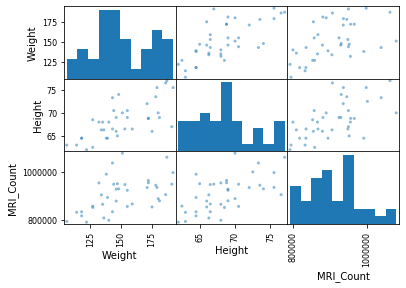

In [14]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290492E2320>,
      dtype=object)

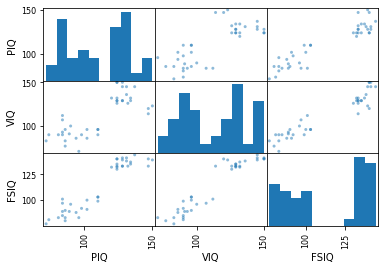

In [13]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   

# Linear models, multiple factors, and analysis of variance
## A simple linear regression

In [17]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})
data.head()

,x,y
0,-5.000000,-13.502619
1,-4.473684,-20.868078
2,-3.947368,-18.954792
3,-3.421053,-19.555032
4,-2.894737,-10.222580


In [18]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           8.56e-08
Time:                        21:44:49   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Categorical variables: comparing groups or multiple categories

In [22]:
data = pd.read_csv('http://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [24]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.445
Time:                        21:47:10   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

## Multiple Regression: including multiple factors

In [25]:
data = pd.read_csv('http://scipy-lectures.org/_downloads/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           1.58e-20
Time:                        21:48:52   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002904BB87F98>,
      dtype=object)

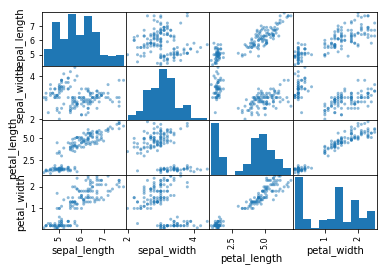

In [26]:
plotting.scatter_matrix(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])   

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [27]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[3.24533535]]), p=0.07369058781700653, df_denom=146, df_num=1>
